#### Insight about the Dataset

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

we will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

#### Importing Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV
import statsmodels.api as sm

#### Loading the dataset

In [44]:
df = pd.read_csv("Telecom_customer_churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


#### We want to predict the churn chances

In [45]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

#### Clearly its a classification problem

#### Importing the libraries for classification problem

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import pickle
import warnings
warnings.filterwarnings('ignore')

#### Finding the shape of the dataset

In [5]:
df.shape

(7043, 21)

#### Checking for null values

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Dataset doesn't have any null values

#### Checking the column type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Majority of the columns are of object datatype

#### Converting objects datatype to numerical

In [46]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
for column in df:
    df[column] = label_enc.fit_transform(df[column])
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,266,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,925,1


#### The target column 0 denotes No and 1 denotes Yes

#### EDA

#### Plotting the graph to examine the relationship of columns with target variable

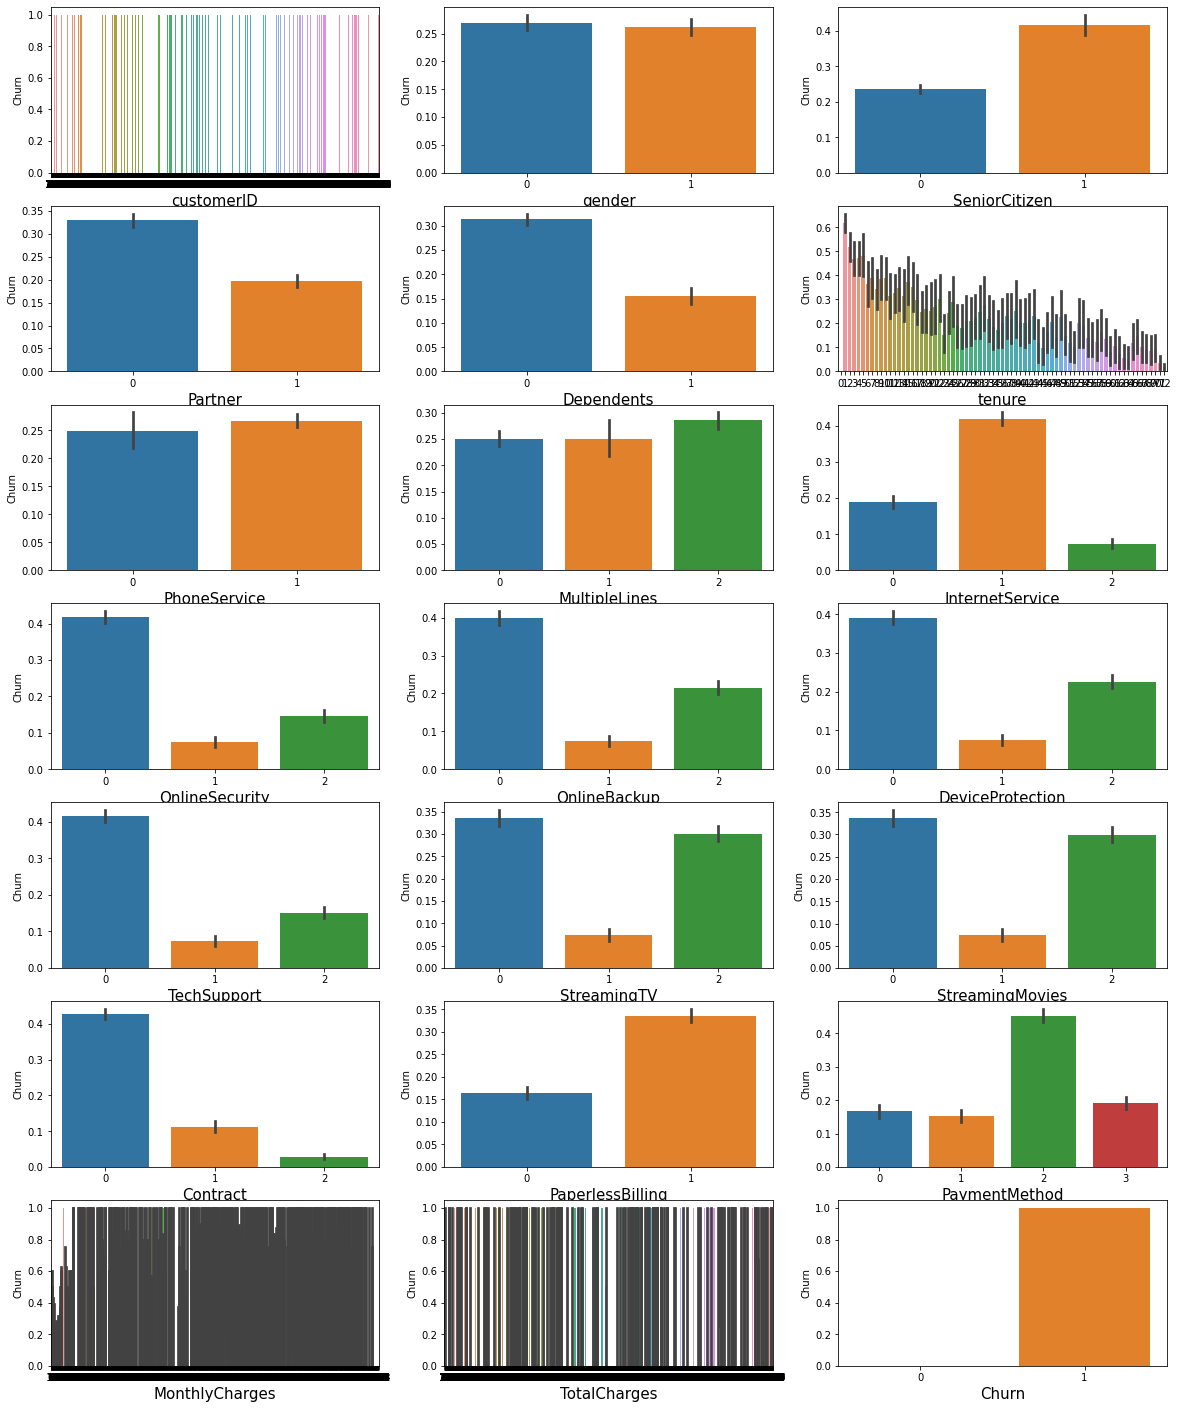

In [11]:
plt.figure(figsize=(20,25))
gr = 1
for column in df:
    if gr<=21:
        ax = plt.subplot(7,3,gr)
        sns.barplot(x = df[column],y=df['Churn'],data=df)
        plt.xlabel(column,fontsize=15)
    gr+=1
plt.show()

##### From the graph it isclear that MonthlyCharges, TotalCharges and customerID doesn't plays a crucial role in customer churn.
##### As Tenure increases the chance of churning decreases

#### Checking the correlation

In [47]:
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.006266,0.003027,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014623,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.219524,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.106501,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.107507,-0.009572,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.268133,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.271209,0.083195,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.444580,0.114955,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.244965,-0.055724,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.044692,0.042357,-0.289309


#### Tenure is having high correlation with churn
#### Gender have the least correlation with churn
#### Multicollinearity is negligible in this dataset

##### Statistical exploration of the dataset

In [13]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,683.524776,3257.794122,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,478.511521,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,199.000000,1609.000000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,722.000000,3249.000000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1090.000000,4901.500000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1584.000000,6530.000000,1.000000


##### The data doesn't seems to have outliers, but then also lets plot the boxplot and see it visually

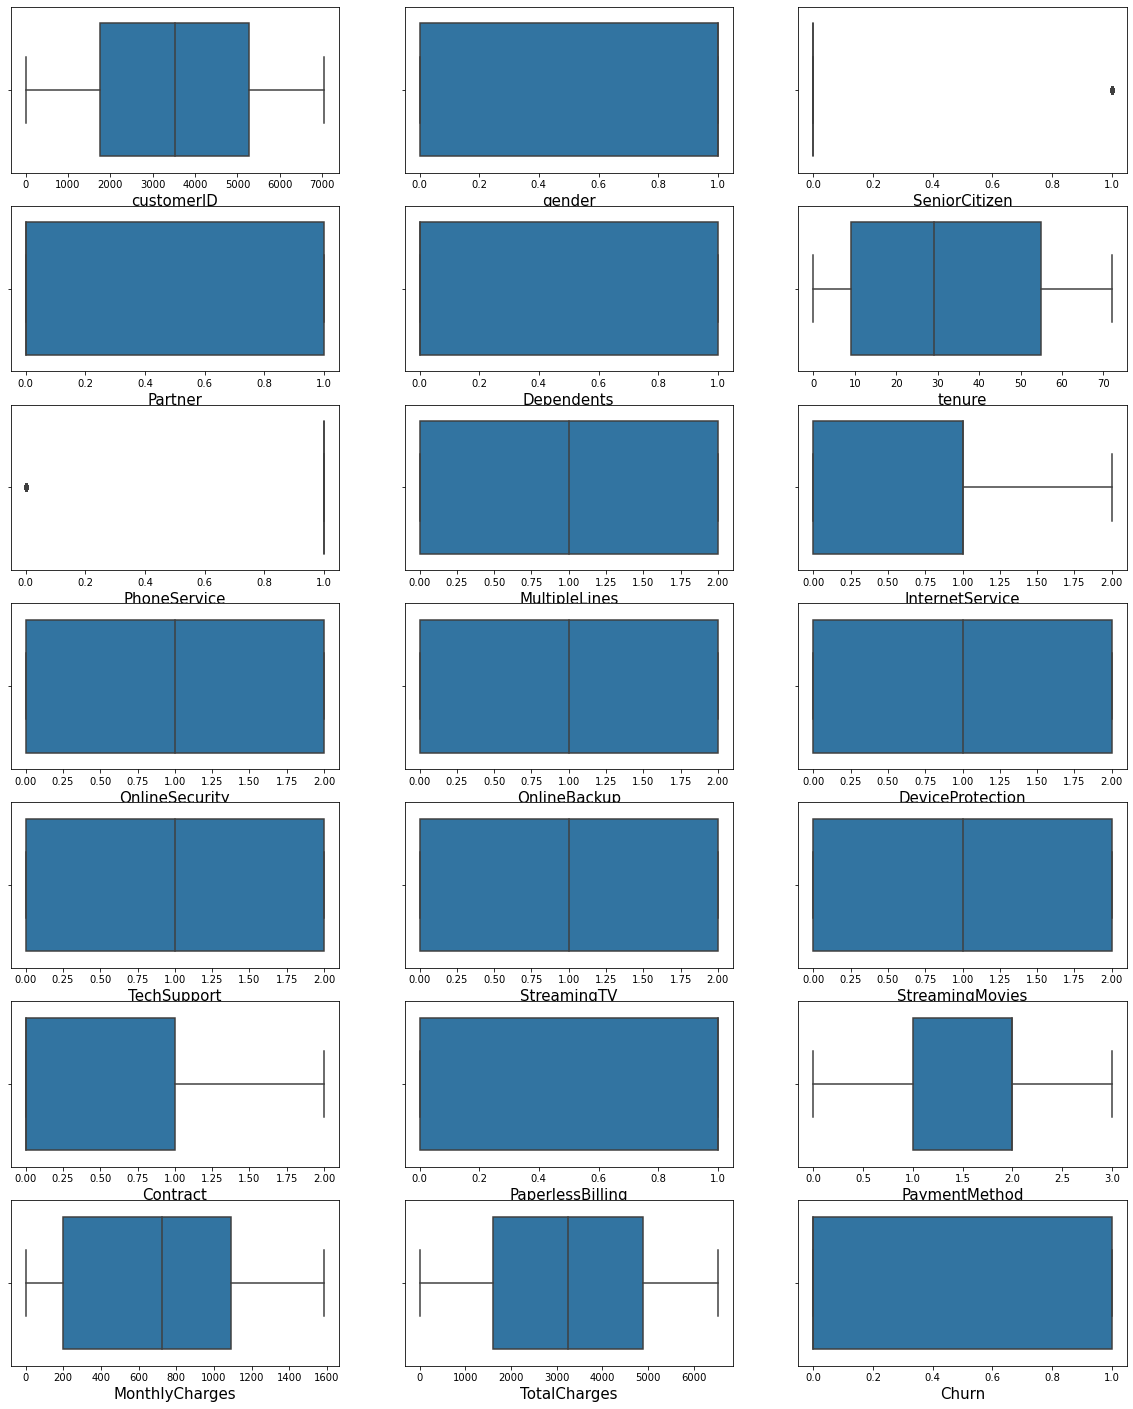

In [14]:
plt.figure(figsize=(20,25))
gr = 1
for column in df:
    if gr<=21:
        ax = plt.subplot(7,3,gr)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=15)
    gr+=1
plt.show()

#### SeniorCitizen and PhoneService have just two classes 0 and 1 and its imbalanced thats why we are getting an outlier point for those two features

#### Checking Skewness

In [15]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges      0.014263
TotalCharges        0.015857
Churn               1.063031
dtype: float64

#### Skewness exists in SeniorCitizen,Dependents,PhoneService, Contract and Churn
#### Skewness exists in the target variable because the class is imbalanced

#### Visualizing the statistical distribution of the columns

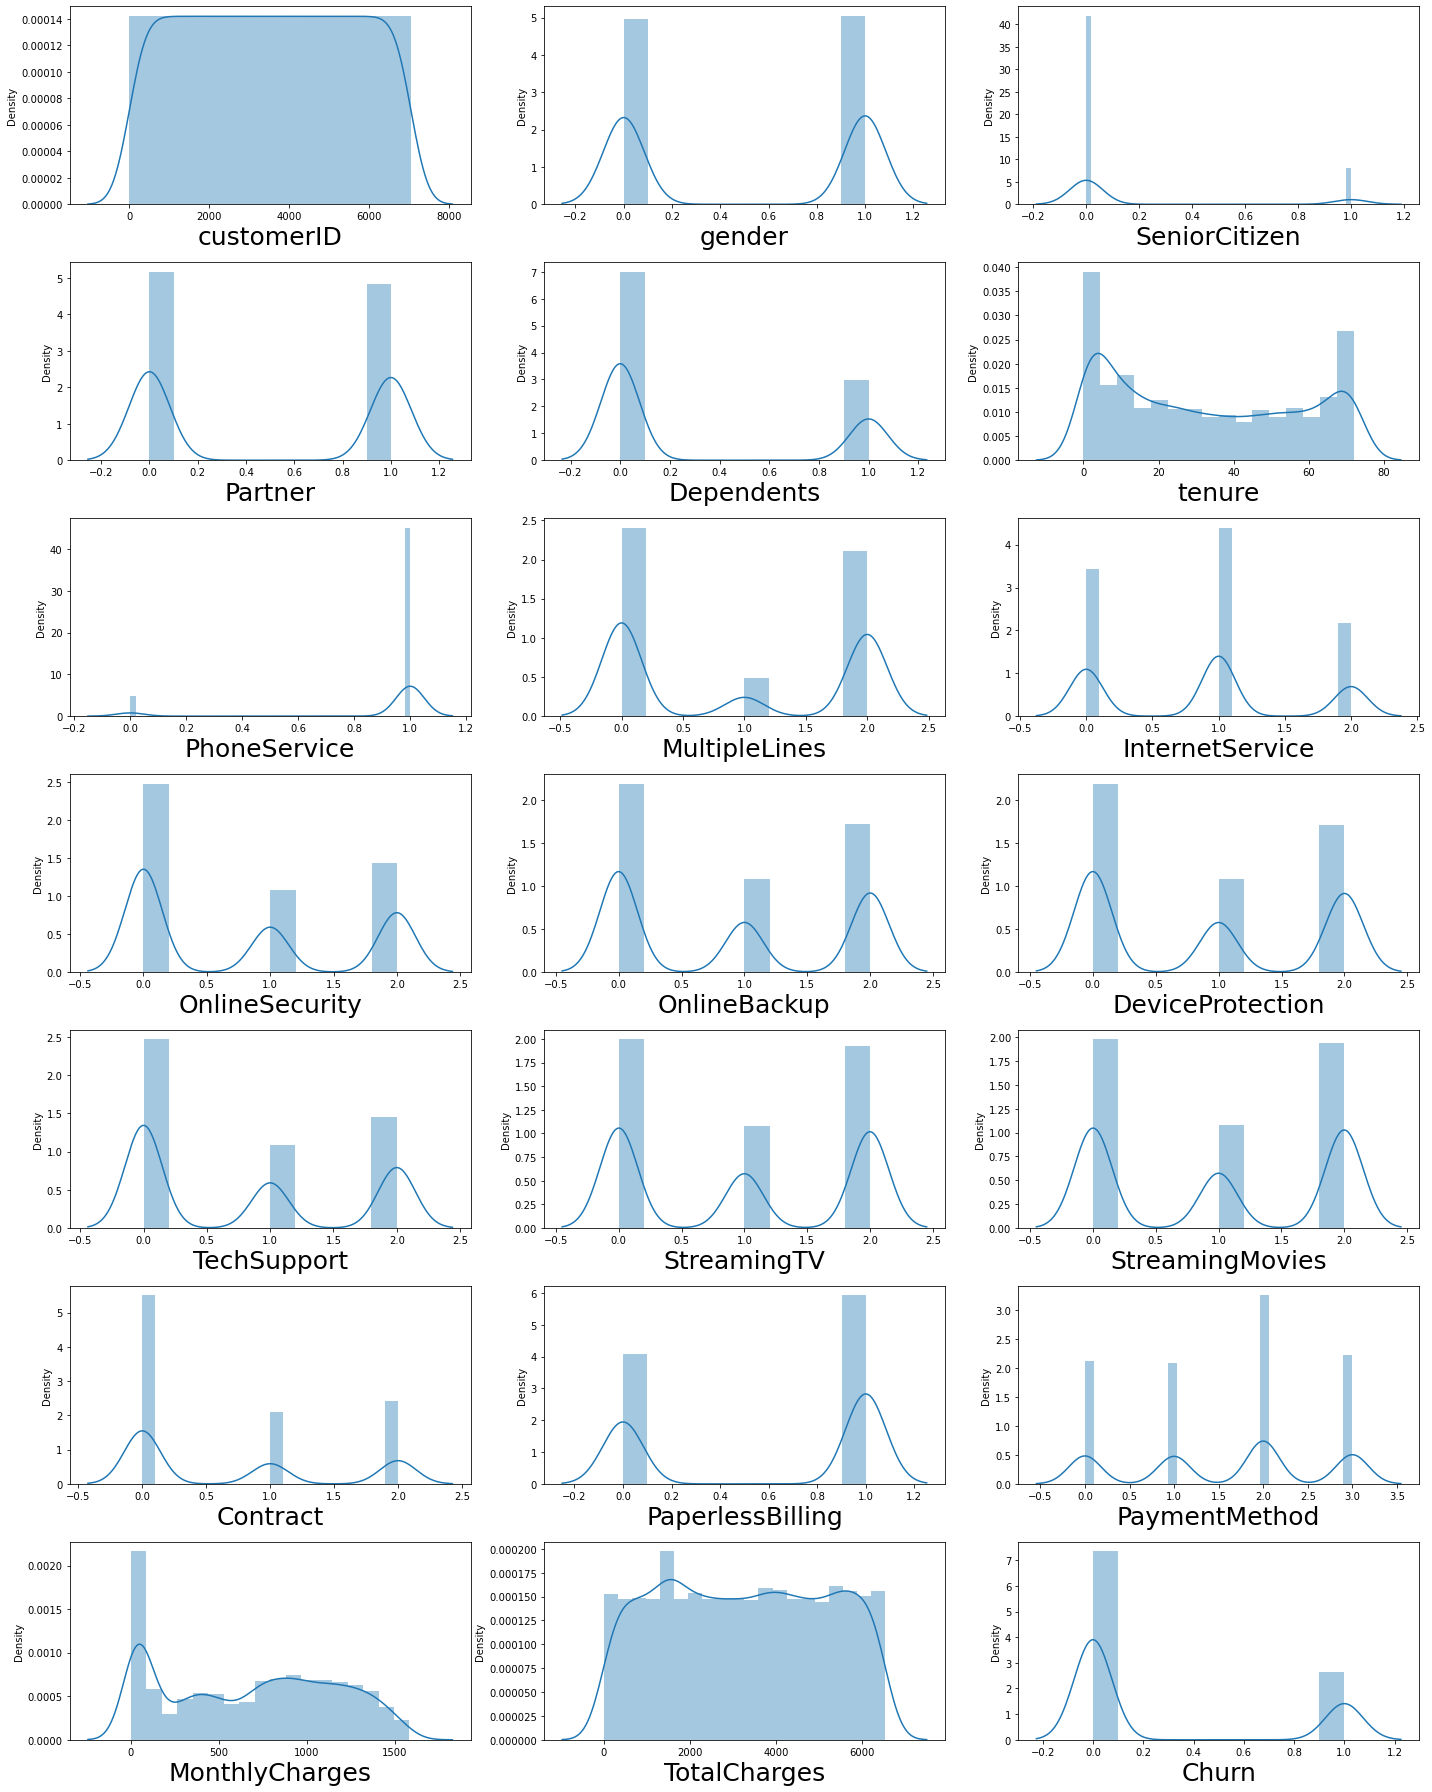

In [16]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in df:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

#### Data Cleaning

#### Dropping the columns SeniorCitizen and PhoneService because its highly skewed and doesn't have correlation with the target variable

In [49]:
df = df.drop(columns=['SeniorCitizen','PhoneService','customerID'],axis=1)
df.head(3)

,gender,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,1,0,0,34,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,1,0,0,2,0,0,2,2,0,0,0,0,0,1,3,436,157,1


In [50]:
df.shape

(7043, 18)

##### Visualizing Class imbalance

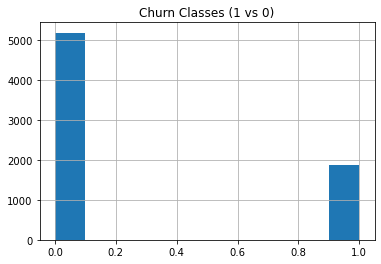

In [19]:
df['Churn'].hist(grid=True)
plt.title("Churn Classes (1 vs 0)")
plt.show()

#### The graph purely explains that target variable is imbalanced

#### The dataset doesn't have any outliers

#### Splitting the dataset into target variable and feature variables

In [51]:
x = df.drop("Churn",axis=1)
y = df['Churn']

#### Removing Skewness

In [52]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')
x_new

array([[-1.00955867,  1.03453023, -0.65401193, ...,  0.40968472,
        -1.06991541, -0.28254766],
       [ 0.99053183, -0.96662231, -0.65401193, ...,  1.31889872,
        -0.15927767, -0.88438245],
       [ 0.99053183, -0.96662231, -0.65401193, ...,  1.31889872,
        -0.28943076, -1.93709705],
       ...,
       [-1.00955867,  1.03453023,  1.5290241 , ...,  0.40968472,
        -1.08752438, -0.02722738],
       [ 0.99053183,  1.03453023, -0.65401193, ...,  1.31889872,
         0.38564885, -0.20008892],
       [ 0.99053183, -0.96662231, -0.65401193, ..., -1.48983732,
         1.25632086,  1.08504111]])

In [53]:
x_new = pd.DataFrame(x_new,columns=x.columns)
x_new.skew()

gender             -0.019031
Partner             0.067922
Dependents          0.875199
tenure             -0.243325
MultipleLines       0.033697
InternetService    -0.072384
OnlineSecurity      0.149362
OnlineBackup       -0.001417
DeviceProtection    0.001051
TechSupport         0.139751
StreamingTV        -0.097211
StreamingMovies    -0.105641
Contract            0.302174
PaperlessBilling   -0.375396
PaymentMethod      -0.207559
MonthlyCharges     -0.413099
TotalCharges       -0.290854
dtype: float64

#### Skewness is removed

#### Balancing the target variable by upsampling

In [54]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_over,y_over = sm.fit_resample(x,y)

In [55]:
y_over.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

#### Scaling Scalar

In [56]:
scale = StandardScaler()
X_scaled = scale.fit_transform(x_over)

#### Finding the best random state

In [57]:
max_accuracy = 0
max_rs = 0
for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y_over,test_size=0.25,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    y_pred = LR.predict(x_test)
    accu_score = accuracy_score(y_test,y_pred)
    if accu_score>max_accuracy:
        max_accuracy = accu_score
        max_rs = i
print("Maximum accuracy is",max_accuracy,"when",max_rs,"is the random state")

Maximum accuracy is 0.8163896405102435 when 409 is the random state


#### Splitting dataset into train and test

In [58]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y_over,test_size=0.25,random_state = 409)

### Model Training

#### Logistic Regression

In [59]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
lr_accuracy = accuracy_score(y_test,y_pred_lr)
print("Accuracy of Logistic Regression model is ",lr_accuracy)
print("Confusion Matrix","\n",confusion_matrix(y_test,y_pred_lr))
classification_rep = classification_report(y_test,y_pred_lr)
print("Classification report ; \n",classification_rep)

Accuracy of Logistic Regression model is  0.8163896405102435
Confusion Matrix 
 [[ 994  264]
 [ 211 1118]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.82      0.79      0.81      1258
           1       0.81      0.84      0.82      1329

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587



#### Logistic Regression works with an accuracy 81.91%

#### Decision Tree Classifier

In [60]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
dt_accuracy = accuracy_score(y_test,y_pred_dt)
conf_mat = confusion_matrix(y_test,y_pred_dt)
classification_rep = classification_report(y_test,y_pred_dt)
print("Accuracy of Decision Tree classifier model is ",dt_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of Decision Tree classifier model is  0.8009277155005798
Confusion Matrix 
 [[ 992  266]
 [ 249 1080]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.80      0.79      0.79      1258
           1       0.80      0.81      0.81      1329

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587



#### Decision tree works with an accuracy of 78.89%

#### Random Forest Classifier

In [61]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test,y_pred_rf)
conf_mat = confusion_matrix(y_test,y_pred_rf)
classification_rep = classification_report(y_test,y_pred_rf)
print("Accuracy of Random forest classifier model is ",rf_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of Random forest classifier model is  0.8565906455353691
Confusion Matrix 
 [[1075  183]
 [ 188 1141]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1258
           1       0.86      0.86      0.86      1329

    accuracy                           0.86      2587
   macro avg       0.86      0.86      0.86      2587
weighted avg       0.86      0.86      0.86      2587



#### Random forest works with an accuracy of 85.78%

#### SVC

In [62]:
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
svc_accuracy = accuracy_score(y_test,y_pred_svc)
conf_mat = confusion_matrix(y_test,y_pred_svc)
classification_rep = classification_report(y_test,y_pred_svc)
print("Accuracy of SVC model is ",svc_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of SVC model is  0.8314650173946656
Confusion Matrix 
 [[1034  224]
 [ 212 1117]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      1258
           1       0.83      0.84      0.84      1329

    accuracy                           0.83      2587
   macro avg       0.83      0.83      0.83      2587
weighted avg       0.83      0.83      0.83      2587



#### SVC works with an accuracy of 83.73%

#### XGBoost Classifier

In [63]:
xgbc = XGBClassifier()
xgbc.fit(x_train,y_train)
y_pred_xgbc = xgbc.predict(x_test)
xgbc_accuracy = accuracy_score(y_test,y_pred_xgbc)
conf_mat = confusion_matrix(y_test,y_pred_xgbc)
classification_rep = classification_report(y_test,y_pred_xgbc)
print("Accuracy of Xgboost model is ",xgbc_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

[20:20:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of Xgboost model is  0.85195206803247
Confusion Matrix 
 [[1061  197]
 [ 186 1143]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      1258
           1       0.85      0.86      0.86      1329

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587



#### XGBoost works with an accuracy of 85.31

#### Cross-Validation

In [64]:
cvs = cross_val_score(lr,X_scaled,y_over,cv=5)
print("Cross validation score of Logistic Regression model is : ",cvs.mean())

Cross validation score of Logistic Regression model is :  0.7872115400331088


In [65]:
cvs = cross_val_score(dt,X_scaled,y_over,cv=5)
print("Cross validation score of DecisionTreeClassifier is : ",cvs.mean())

Cross validation score of DecisionTreeClassifier is :  0.7891485769923159


In [66]:
cvs = cross_val_score(rf,X_scaled,y_over,cv=5)
print("Cross validation score of RandomForestClassifier is : ",cvs.mean())

Cross validation score of RandomForestClassifier is :  0.8413349584270214


In [67]:
cvs = cross_val_score(svc,X_scaled,y_over,cv=5)
print("Cross validation score of SVC is : ",cvs.mean())

Cross validation score of SVC is :  0.813211217816257


In [68]:
cvs = cross_val_score(xgbc,X_scaled,y_over,cv=5)
print("Cross validation score of XGBoostClassifier is : ",cvs.mean())

[20:20:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:20:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:20:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:20:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

#### Taking RandomForestClassifier as the best model because difference between model accuracy and cross-validation score is negligible(1.5) and gives the best cross validation score

#### Hyper parameter tuning

In [75]:
params = {'random_state':[1,500],
         'max_depth':[2,20,1],
         'min_samples_leaf':[1,10,1],
         'min_samples_split':[2,12,1]}
grid = GridSearchCV(estimator = rf,param_grid = params,cv=10,n_jobs=-1)
grid.fit(x_train,y_train)
best_params = grid.best_params_
print("Best Parameters are \n",best_params)

Best Parameters are 
 {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 1}


In [76]:
rf = RandomForestClassifier(max_depth=20,min_samples_leaf=1,min_samples_split=2,random_state=1)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test,y_pred_rf)
conf_mat = confusion_matrix(y_test,y_pred_rf)
classification_rep = classification_report(y_test,y_pred_rf)
print("Accuracy of Random forest classifier model is ",rf_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of Random forest classifier model is  0.8527251642829532
Confusion Matrix 
 [[1067  191]
 [ 190 1139]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1258
           1       0.86      0.86      0.86      1329

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587



#### After hyper parameter tuning accuracy increased by 85.27%

#### Plotting ROC Curve

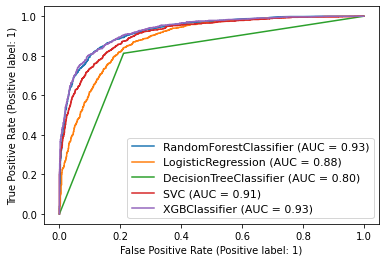

In [77]:
disp = plot_roc_curve(rf,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgbc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

#### XGBClassifier is the best model

#### Saving the model

In [78]:
filename = 'customer_churn.pkl'
pickle.dump(rf,open(filename,'wb'))